In [2]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

# Etapa 1
### Atividade 1

### Atividade 2

In [3]:
#classe transformador
class Transformador():
    R1=0
    R2=0
    L1=0
    L2=0
    C1=0
    C2=0
    k=1
    def M(self):
        return self.k*sqrt(self.L1*self.L2)
    def Ressonancia(self):
        return [1/(2*pi*sqrt(self.L1*self.C1)), 1/(2*pi*sqrt(self.L2*self.C2))]
    def FatoresDeQualidade(self):
        return [sqrt(self.L1/self.C1)/self.R1, sqrt(self.L2/self.C2)/self.R2]

In [4]:
# #Transformador com os dados do experimento
# Trafo1 = Transformador()
# Trafo1.R1=0.5
# Trafo1.R2=0.5
# Trafo1.L1=196e-6
# Trafo1.L2=196e-6
# Trafo1.C1=0.1e-6
# Trafo1.C2=0.1e-6
# Trafo1.k=1

# print(Trafo1.M())
# print(Trafo1.Ressonancia())
# print(Trafo1.FatoresDeQualidade())

In [5]:
#calculando C
C= 1/(((60*pi)**2)*3.40987e-6)

#Transformador com os dados do experimento
Trafo1 = Transformador()
Trafo1.R1=3.35
Trafo1.R2=3.35
Trafo1.L1=3.40987e-6
Trafo1.L2=3.40987e-6
Trafo1.C1= C
Trafo1.C2= C
Trafo1.k=1

print(Trafo1.M())
print(Trafo1.Ressonancia())
print(Trafo1.FatoresDeQualidade())

(3.40987e-06+0j)
[(30+0j), (30+0j)]
[(0.00019186428432888764+0j), (0.00019186428432888764+0j)]


### Atividade 3

In [10]:
#função que calcula as correntes i1 e 12 com capacitor C1 em série no primário e C2 em paralelo no secundário
def CalcularTransformadorC2Paralelo(Trafo, V1, Rcarga, freq):
    #frequência algular
    w=2*pi*freq
    R1=Trafo.R1
    R2=Trafo.R2
    XL1=1j*w*Trafo.L1
    XL2=1j*w*Trafo.L2
    XM=1j*w*Trafo.M()      
    XC1=1/(1j*w*Trafo.C1)
    XC2=1/(1j*w*Trafo.C2)    
    #cálculo do transformador 
    Zparalelo=1/(1/XC2+1/Rcarga)
    Z=np.array([[R1+XL1+XC1, -XM],[XM, -XL2-R2-Zparalelo]])
    #adaptação: no circuito é onda quadrada, então a amplitude deve ser menor: a da fundamental
    V=np.array([V1,0])    
    i=np.dot(linalg.inv(Z),V)    
    return i[0], i[1]

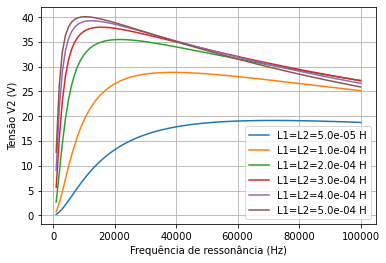

In [11]:
Trafo2 = Transformador()
Trafo2.R1=3.35
Trafo2.R2=3.35
Trafo2.L1=3.40987e-6
Trafo2.L2=3.40987e-6
Trafo2.k=0.1
lisFreq=np.linspace(1e3, 100e3, 100)

Rc=400
#lisIndutancias=np.linspace(10e-6, 1000e-6, 7)
lisIndutancias=[50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]

for L in lisIndutancias:
    Trafo2.L1=L
    Trafo2.L2=L
    lisVout=[]
    for freq in lisFreq:
        w=2*pi*freq
        Trafo2.C1=1/(Trafo2.L1*w**2)
        Trafo2.C2=1/(Trafo2.L2*w**2)
        Trafo2.R1=0.5+0.5*5*freq/100e3
        Trafo2.R2=0.5+0.5*5*freq/100e3
        #Trafo2.R1=0.5
        #Trafo2.R2=0.5
        i1, i2 = CalcularTransformadorC2Paralelo(Trafo2, 5, Rc, freq)
        XC2=1/(1j*w*Trafo2.C2) 
        Zparalelo=1/(1/Rc+1/XC2)
        Vout=Zparalelo*i2
        lisVout.append(abs(Vout))

    plt.plot(lisFreq, lisVout, label="L1=L2=%.1e H" %L)
plt.xlabel("Frequência de ressonância (Hz)")
plt.ylabel("Tensão V2 (V)")
plt.legend()
plt.grid(True)
plt.show()

### Atividade 4

### Atividade 5

### Atividade 6